
____
# <font color=#00FFBB>HW: Linear Regression</font>
____


____
____
![loss](https://miro.medium.com/max/574/1*mOjTP97xJacJLEAQx_L9eA.png)
____
## <font color=#BB00FF>Problem #1 (10pts)</font>

Derive the basic equations given in class for linear regression (LR) in 1D. Show all of your work. Open a markdown cell and use [$\LaTeX$](https://ashki23.github.io/markdown-latex.html) for the equations.

That is, use the MSE:
$${\cal L}(m,b) = \frac{1}{2}\sum_d \left(y_d - mx_d - b \right)^2,$$
and the minimization condition
$$\frac{\partial {\cal L}}{\partial m} = 0,$$
$$\frac{\partial {\cal L}}{\partial b} = 0.$$
Solve for $m$ and $b$ and write your answer in terms of statistical quantities such as the variances, covariances and/or means. Note that you have two equations in two unknowns; you will have to solve those simultaneous equations to get the expressions for $m$ and $b$.

There are many different notations used for these types of problems. I suggest you establish a convention you like to use and stick with it. Here is what I propose we use for now:

* expectation value (mean)
$$\mathrm{E}[X] \equiv \langle X\rangle \equiv \mu,$$
$$    = \frac{1}{N}\sum_{d=1}^N x_d,$$
where the $d$ sum is over the $N$ data points.

* variance
$$\mathrm{Var}[X] = \mathrm{E}[(X - \mathrm{E}[X])^2],$$
$$    = \mathrm{E}[X^2] - \mathrm{E}[X]^2,$$
$$    = \langle X^2\rangle - \mu^2,$$
$$    = \mathrm{Cov}[X,X].$$

* covariance
$$\mathrm{Cov}[X,Y] = \mathrm{E}[(X - \mathrm{E}[X])(Y - \mathrm{E}[Y])],$$
$$    = \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y].$$

I tried to follow definitions used in Wikipedia so that we can all use the same conventions. Note that I have indicated some options for the mean so that you get used to seeing different forms.

I wanted to comment on these conventions. There are two choices here that are not universal: the factor of $\frac{1}{2}$ in ${\cal L}$ and the factor of $\frac{1}{N}$ in the statistical quantities. Neither of these choices really matters as long as you:
* are consistent everywhere in your math,
* use other people's libraries correctly (e.g., `statsmodels`),
* communicate to others what you did.

These choices are commonly made because they make the math cleaner, as you will see.

Organize your equations so that you completely understand them. You will code them in the final problem below.

📝
From the minimization condition, we have:

a. $$\frac{\partial {\cal L}}{\partial m} = 0,$$
    $$\Leftrightarrow  \frac{\partial {\cal L}}{\partial m} = \frac{1}{2}\sum_d 2(-x_d)\left(y_d - mx_d - b \right) \\
    =\sum_d x_d\left(-y_d + mx_d + b \right)\\
    = \sum_d \left(-x_dy_d + mx_d^{2} + bx_d \right) \\
    =N\left( -\mathrm{E}[XY] + m\mathrm{E}[X^{2}] + b\mathrm{E}[X] \right) \\
    =0$$

b. $$\frac{\partial {\cal L}}{\partial b} = 0.$$
    $$\Leftrightarrow  \frac{\partial {\cal L}}{\partial b} = \frac{1}{2}\sum_d (-2)\left(y_d - mx_d - b \right) \\
    =\sum_d \left(-y_d + mx_d + b \right)\\
    =N\left(-\mathrm{E}[Y] + m\mathrm{E}[X] + b \right)\\
    =0$$

from `a.` and `b.`, we get:

$$
\begin{cases}
-\mathrm{E}[XY] + m\mathrm{E}[X^{2}] + b\mathrm{E}[X] = 0 \\ 
-\mathrm{E}[Y] + m\mathrm{E}[X] + b  = 0 \\
\end{cases}
$$
$$
\Leftrightarrow \begin{cases}
b\mathrm{E}[X] -\mathrm{E}[XY] + m\mathrm{E}[X^{2}] = 0 & \quad \text{(1)}\\ 
b  = \mathrm{E}[Y] - m\mathrm{E}[X]  & \quad \text{(2)}\\
\end{cases}
$$

replace b in (1) with (2) and using the definition of $\mathrm{Cov}[X,Y]$ and $\mathrm{Var}[X,X]$  yields:
$$
(\mathrm{E}[Y] - m\mathrm{E}[X])(\mathrm{E}[X]) -\mathrm{E}[XY] + m\mathrm{E}[X^{2}] \\
= \mathrm{E}[X]\mathrm{E}[Y] - m\mathrm{E}[X]^{2} -(\mathrm{Cov}[X,Y] + \mathrm{E}[X]\mathrm{E}[Y]) + m(\mathrm{Var}[X] + \mathrm{E}[X]^{2})\\
= -\mathrm{Cov}[X,Y] + m\mathrm{Var}[X] = 0
$$

$$
\Rightarrow m = \frac{\mathrm{Cov}[X,Y]}{\mathrm{Var}[X]}\\
b = \mathrm{E}[Y] - \frac{\mathrm{Cov}[X,Y]}{\mathrm{Var}[X]}\mathrm{E}[X]
$$

____
____
![cc](https://lh5.googleusercontent.com/7ZbEpmcYpEgMj9Qujn0r3_q7M7Oce5uBvTUpYO3p06mQ7L7arqNRZPYQ9Drjx7uMIcj8Nqyk40k7Y4eTXfQ_vmo97LQjFTM0zIaOrKuUUkYpqE5ks5MDxC4Zfelou2kkvnVuky-J)
____
## <font color=#BB00FF>Problem #2 (5pts)</font>

Watch this video:




In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/qtaqvPAeEJY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In a markdown cell describe covariance and correlation, explain the difference and why we need two related quantities. That is, what does correlation do for us that covariance does not?

📝 
* Covariance shows the relationship between two variables, a positive covariance reflects a positive trend that the values for one variable increase as the value for the other variable increase and the opposite for negative covariance. If there is no relationship between the two variables, covarriance would be zero. 
* One main drawback of covariance is that covariance is hard to interpret because the covariance value is sensitive to scaling even when the relationship doesn't change. It also does not tell us about the relative distance from the values to the trend line. That is why we have correlation which describes relationships just as covariance does but better yet, it is not sensitive to the scale of data. However, covariance is not useless, in fact it is used in the calculation of correlation and is the stepping stones for a wide range of analyses.

____
____
![Tufte](https://thedoublethink.com/wp-content/uploads/2016/09/lie_factor_example1_image.jpg)
____
## <font color=#BB00FF>Problem #3 (5pts)</font>

In a markdown cell, describe three of Tufte's rules of good visualization.

📝 Three of Tufte's rules of good visualization are:
1. Make your plots honest: don't mislead the viewer by things like disproportional scaling or "Lie Factor" in your chart.
2. Remove ink that adds no value: don't present information that does not need to be there, ask yourself "If I remove this, will my chart convey the same message?" If the answer is yes, then remove the ink.
3. Don’t use gimmicks that make your chart difficult to understand: Your chart should be straight to the point, intuitive and enable the audiences to derive your message right from the start. No need for fancy charts that pose a puzzle to the audiences. 

____
____
![sl](https://blog.streamlit.io/content/images/size/w600/2022/04/Live-Data-Science-Dashboard-GIF.gif)
____
## <font color=#BB00FF>Problem #4 (25pts)</font>

Before we get to your project, just a reminder about some dates:
* **Oct. 18** is project presentations!
* On that day, students are divided in groups of 4 and 5. As mentioned in hw 5, the order of presentation are random, so you should be prepared to present the work once you arrive.
* Each student will have a $\sim 10$ minute presentation on their projects, their goals, and what they have achieved.
* After each presentation, the rest of the group will have $\sim 5$ minutes to discuss the project and ask their questions.
* In addition to presenting your project, you are going to listen to each other presentation. Each student will submit one report which include feedbacks from other presentations of their group.
* A rubric will be provided on **Oct. 18** which will be used a guidance for presentation reports.
* The presentation reports are due on **Oct. 18**.
* **Oct. 23** is Fall Break; we will have an ICA on the Wednesday of that week combining material from previous topics
* **Oct. 27** is Project submission due date.
* **Oct. 30** is a normal week, except that I will not be here; you will have graduate student [David Butts](https://icer.msu.edu/about/announcements/icer-student-highlights-david-butts)


You should be in good shape with your project! You have this week to complete it. You should have:
* picked a dataset,
* you know what is interesting about it,
* you developed a story/narrative of the dataset,
* you are now an expert on excellent visualization,
* you know how to build a simple streamlit web app,
* and you have mostly put all of these together.

The final step is deploying the web app, which you will do this week. Previously, you watched some videos on how to do this, so you should be mostly ready. For this HW you could deploy your actual project -- _if you have it done!_ -- but more likely you will deploy a smaller, practice version of it.

Just a reminder of the steps:
* you need a practice `.py` file using `streamlit` in addition to any datasets that might be required within the python file,
* you need to create an additional file which is `requirements.txt` and includes the libraries. You can use the `pipreqs` method which is explained [here](https://stackoverflow.com/questions/31684375/automatically-create-file-requirements-txt).

As you have seen in the past HWs, you can easily deploy your apps directly into streamlit. To do that, you need to create a GH repository (create a public repo for your project to ensure that the streamlit link you shared can be opened by anyone in your group, me or Mahyar). Once you have a repo with a python file, required data files, and a `requirement.txt`, you need to login to streamlit (with the same email as you have for GH account). There you can create a new app based on the project repository. If you have any problems, post your questions in Slack.

When you are done, paste the link here so that Mahyar can test it. Mahyar will share a google document on **Oct. 16** which you are going to put your **full name** and the **streamlit link** for your webapp (remember that link for your final version of mid-term project should be provided before the class starts on **Oct. 18**).

For the midterm project, you will do three things:
* give a $\sim 10$ minute presentation during class (on the Wed **Oct. 18**),
* turn in your code and dataset to D2L,
* provide the link to the operational web app.

We will collect the links so that you can all see what the other students have done, and we will share them with other faculty. (If there is a reason your link cannot be shared, please let me know.)




____
## <font color=#BB00FF>Problem #5 (5pts)</font>

Create a dataset that is a noisy line; that is, you have $y= mx+b$ and you want to add a controllable amount of noise to that. From the equations you derived in the first problem, use that data to compute the slope $m'$ and intercept $b'$, where the prime indicates a value inferred from the data.

Confirm with a plot that you are getting a good fit to your data. Vary the noise, make more plots and comment on how well you are able to predict the actual values of $m$ and $b$.

Finally, in a markdown cell, discuss how you could use the code you just wrote to handle missing values. Are there other steps you would want to add?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

<Axes: >

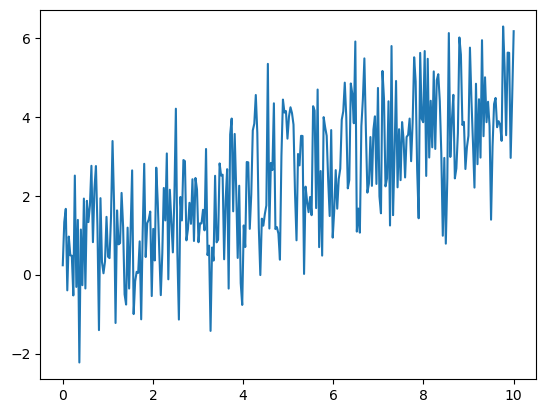

In [51]:
x = np.linspace(0, 10, 300)
m = 0.4
b = -2
y = m*x + b + np.random.normal(scale=0.7, size=300) + np.random.randint(low=1, high= 5, size=300)
sns.lineplot(x=x, y=y)

0.40024402754226657 0.42001024110886664


<Axes: >

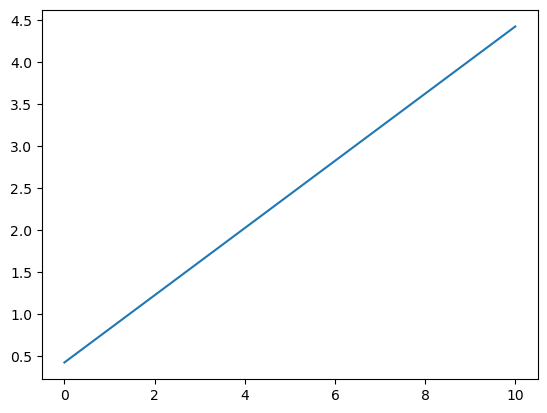

In [52]:
m_ = np.cov(x, y)[0,1]/np.var(x)
b_ = np.mean(y) - (np.cov(x, y)[0,1]/np.var(x))*np.mean(x)
print(m_, b_)
f_y = m_*x + b_
sns.lineplot(x=x, y=f_y)

📝 It works really well the trend and the overall line is restored, it did a great job at getting back the `m'` for the `b'` because I add too mcuch noise there it could not get back the original `-2` value but if I remove the `+ np.random.randint(low=1, high= 5, size=300)` it could have done so

0.39222430198050523 -1.8942924715933362


<Axes: >

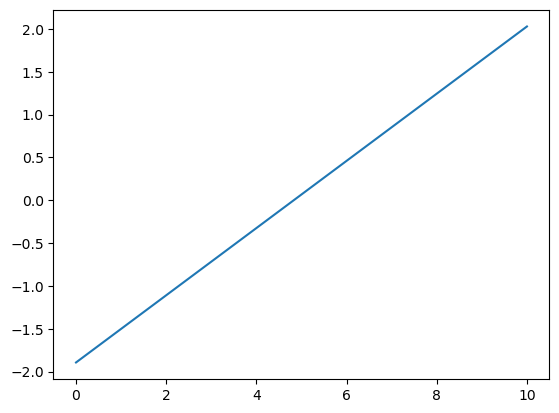

In [53]:
x = np.linspace(0, 10, 300)
m = 0.4
b = -2
y = m*x + b + np.random.normal(scale=0.7, size=300)
m_ = np.cov(x, y)[0,1]/np.var(x)
b_ = np.mean(y) - (np.cov(x, y)[0,1]/np.var(x))*np.mean(x)
print(m_, b_)
f_y = m_*x + b_
sns.lineplot(x=x, y=f_y)